In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
# from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key = '8ec952d4e4092c596aad13ddfae6d358'

In [2]:
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities[:600]):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gorontalo
Processing Record 2 of Set 1 | urumqi
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | sapao
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ust-maya
Processing Record 9 of Set 1 | henties bay
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | puerto penasco
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | barinitas
Processing Record 20 of Set 1 | kawalu
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | breves
Processing Rec

Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | sapa
Processing Record 38 of Set 4 | kutum
Processing Record 39 of Set 4 | tsabong
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | ishigaki
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | santa rosa
Processing Record 45 of Set 4 | ishim
Processing Record 46 of Set 4 | san pedro
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | aktanysh
Processing Record 49 of Set 4 | tiksi
Processing Record 0 of Set 5 | cervo
Processing Record 1 of Set 5 | miri
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | frankenthal
Processing Record 5 of Set 5 | tahe
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | el sauzal
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | ritchie
Processing Record 10 of Set 5 | arkhangelsk

Processing Record 29 of Set 8 | jos
Processing Record 30 of Set 8 | rocha
Processing Record 31 of Set 8 | kralendijk
Processing Record 32 of Set 8 | cabo san lucas
Processing Record 33 of Set 8 | tuy hoa
Processing Record 34 of Set 8 | matay
Processing Record 35 of Set 8 | qandahar
City not found. Skipping...
Processing Record 36 of Set 8 | staryy nadym
Processing Record 37 of Set 8 | gwadar
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | skeldon
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 8 | alappuzha
Processing Record 43 of Set 8 | ryotsu
Processing Record 44 of Set 8 | buta
Processing Record 45 of Set 8 | yingkou
Processing Record 46 of Set 8 | atar
Processing Record 47 of Set 8 | nasirabad
Processing Record 48 of Set 8 | jonuta
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | barra do corda
Processing Record

Processing Record 16 of Set 12 | belmonte
Processing Record 17 of Set 12 | orlovskiy
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | kaduqli
Processing Record 20 of Set 12 | madimba
Processing Record 21 of Set 12 | pathein
Processing Record 22 of Set 12 | moron
Processing Record 23 of Set 12 | mahibadhoo
Processing Record 24 of Set 12 | wanlaweyn
Processing Record 25 of Set 12 | kargil
Processing Record 26 of Set 12 | talara
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 29 of Set 12 | bandar
Processing Record 30 of Set 12 | miandoab
Processing Record 31 of Set 12 | sabang
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 | longlac
City not found. Skipping...
Processing Record 34 of Set 12 | meyungs
City not found. Skipping...
Processing Record 35 of Set 12 | novikovo
Processing Record 36 of Set 12 | korla
Processing Record 37 o

In [4]:
citydf= pd.DataFrame(city_data)
citydf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gorontalo,0.54,123.06,75.36,89,69,2.80,ID,1595256634
1,urumqi,43.80,87.60,82.40,34,100,4.47,CN,1595256634
2,saint george,37.10,-113.58,84.99,20,1,5.82,US,1595256634
3,bethel,41.37,-73.41,84.00,69,1,8.05,US,1595256634
4,east london,-33.02,27.91,73.40,25,0,5.82,ZA,1595256635
...,...,...,...,...,...,...,...,...,...
545,vieques,18.43,-65.83,87.80,66,40,13.87,PR,1595256750
546,maniitsoq,65.42,-52.90,48.97,79,100,5.23,GL,1595256751
547,dhidhdhoo,6.88,73.10,83.08,76,100,20.07,MV,1595256751
548,la ronge,55.10,-105.28,62.60,88,75,3.36,CA,1595256751


In [5]:
 citydf.describe()
    

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.00000,5.500000e+02
mean,19.407873,20.106836,72.379345,66.749091,50.530909,7.84720,1.595257e+09
std,33.320904,89.551897,14.337919,22.303396,37.118453,5.10221,6.189054e+01
min,-54.800000,-175.200000,26.600000,3.000000,0.000000,0.16000,1.595256e+09
25%,-8.082500,-60.302500,62.500000,54.000000,17.000000,4.07000,1.595257e+09
50%,22.790000,24.700000,75.200000,71.000000,46.500000,6.93000,1.595257e+09
75%,46.930000,97.932500,82.400000,83.000000,90.000000,10.29000,1.595257e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,28.07000,1.595257e+09


In [6]:
cityhumidity=citydf[citydf["Humidity"]>100].index
cityhumidity

Int64Index([], dtype='int64')

In [7]:
cleandata=citydf.drop(cityhumidity,inplace=False)
cleandata

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gorontalo,0.54,123.06,75.36,89,69,2.80,ID,1595256634
1,urumqi,43.80,87.60,82.40,34,100,4.47,CN,1595256634
2,saint george,37.10,-113.58,84.99,20,1,5.82,US,1595256634
3,bethel,41.37,-73.41,84.00,69,1,8.05,US,1595256634
4,east london,-33.02,27.91,73.40,25,0,5.82,ZA,1595256635
...,...,...,...,...,...,...,...,...,...
545,vieques,18.43,-65.83,87.80,66,40,13.87,PR,1595256750
546,maniitsoq,65.42,-52.90,48.97,79,100,5.23,GL,1595256751
547,dhidhdhoo,6.88,73.10,83.08,76,100,20.07,MV,1595256751
548,la ronge,55.10,-105.28,62.60,88,75,3.36,CA,1595256751


In [8]:
cleandata.to_csv(output_data_file,index_label="city_id")

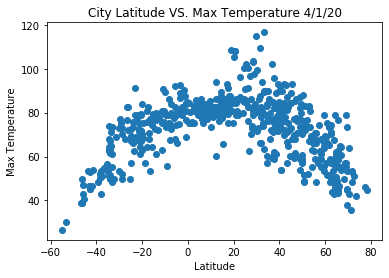

In [9]:
plt.scatter(cleandata["Lat"],cleandata["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude VS. Max Temperature 4/1/20")
plt.savefig("images/Max_temerature.png", bbox_inches = "tight")

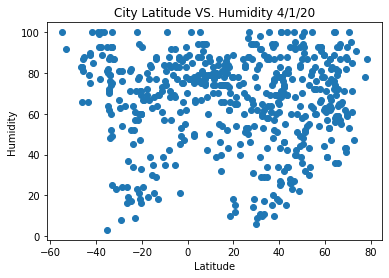

In [10]:
#Latitude vs. Humidity Plot
plt.scatter(cleandata["Lat"],cleandata["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude VS. Humidity 4/1/20")
plt.savefig("images/humidity.png", bbox_inches = "tight")

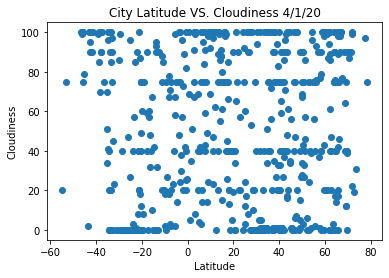

In [11]:
#Latitude vs. Cloudiness Plot
plt.scatter(cleandata["Lat"],cleandata["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude VS. Cloudiness 4/1/20")
plt.savefig("images/cloudiness.png", bbox_inches = "tight")

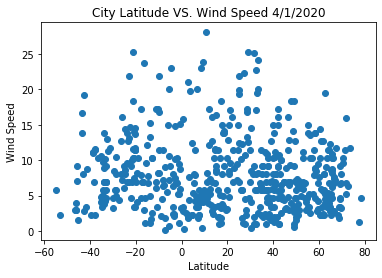

In [12]:
#Latitude vs. Wind Speed Plot
plt.scatter(cleandata["Lat"],cleandata["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude VS. Wind Speed 4/1/2020")
plt.savefig("images/wind_speed.png", bbox_inches = "tight")

In [13]:
NHemisphere= cleandata.loc[cleandata['Lat'] > 0]
NHemisphere                           

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gorontalo,0.54,123.06,75.36,89,69,2.80,ID,1595256634
1,urumqi,43.80,87.60,82.40,34,100,4.47,CN,1595256634
2,saint george,37.10,-113.58,84.99,20,1,5.82,US,1595256634
3,bethel,41.37,-73.41,84.00,69,1,8.05,US,1595256634
6,ust-maya,60.42,134.53,68.68,61,100,14.38,RU,1595256635
...,...,...,...,...,...,...,...,...,...
545,vieques,18.43,-65.83,87.80,66,40,13.87,PR,1595256750
546,maniitsoq,65.42,-52.90,48.97,79,100,5.23,GL,1595256751
547,dhidhdhoo,6.88,73.10,83.08,76,100,20.07,MV,1595256751
548,la ronge,55.10,-105.28,62.60,88,75,3.36,CA,1595256751


In [14]:
SHemisphere=cleandata.loc[cleandata['Lat'] < 0]
SHemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,east london,-33.02,27.91,73.40,25,0,5.82,ZA,1595256635
5,busselton,-33.65,115.33,50.00,60,100,10.18,AU,1595256635
7,henties bay,-22.12,14.28,77.50,23,0,9.24,NA,1595256635
8,rikitea,-23.12,-134.97,68.47,57,85,13.09,PF,1595256635
9,codrington,-38.27,141.97,50.14,77,70,6.91,AU,1595256636
...,...,...,...,...,...,...,...,...,...
531,talara,-4.58,-81.27,66.20,77,14,23.04,PE,1595256748
539,biak,-0.91,122.88,76.53,83,25,5.23,ID,1595256749
541,maceio,-9.67,-35.74,78.80,74,75,21.92,BR,1595256750
542,pietersburg,-23.90,29.47,66.20,34,0,6.93,ZA,1595256750


In [35]:
def plot_linear(x_values,y_values,title,cordinates,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.savefig(filename)
    plt.show()
    

y = -0.46x + 91.77


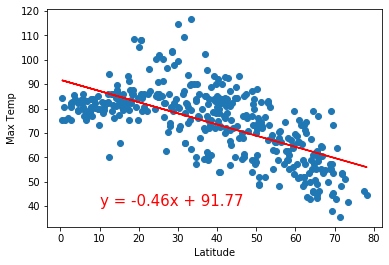

In [37]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Max Temp']
plot_linear(x_values,y_values,"Max Temp",(10,40),"images/Nmaxtemp.png")

y = 0.83x + 86.4


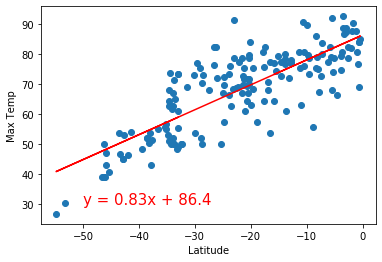

In [38]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Max Temp']
plot_linear(x_values,y_values,"Max Temp",(-50,30),"images/Smaxtemp.png")

y = -0.04x + 68.51


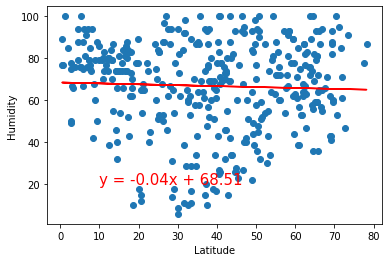

In [26]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Humidity']
plot_linear(x_values,y_values,"Humidity",(10,20),"images/Nhumidity.png")

y = -0.3x + 60.01


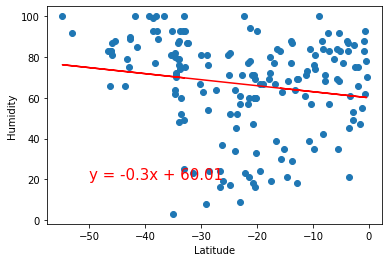

In [39]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Humidity']
plot_linear(x_values,y_values,"Humidity",(-50,20),"images/Shumidity.png")

y = -0.06x + 54.44


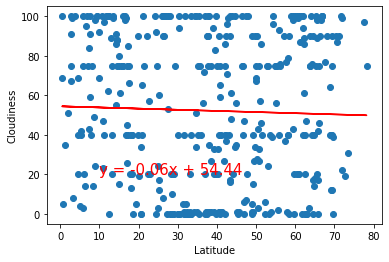

In [40]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Cloudiness']
plot_linear(x_values,y_values,"Cloudiness",(10,20),"images/NCloudiness.png")

y = -0.39x + 38.19


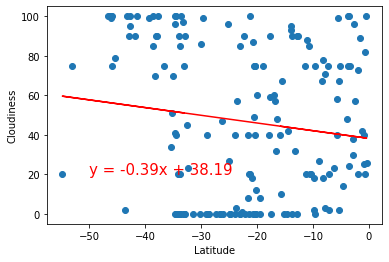

In [41]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Cloudiness']
plot_linear(x_values,y_values,"Cloudiness",(-50,20),"images/SCloudiness.png")

y = -0.02x + 8.36


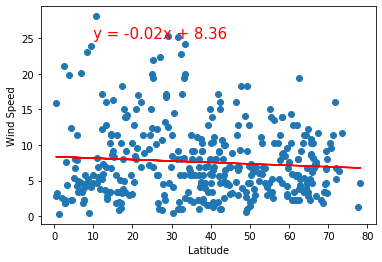

In [43]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Wind Speed']
plot_linear(x_values,y_values,"Wind Speed",(10,25),"images/NWindspeed.png")

y = 0.03x + 9.15


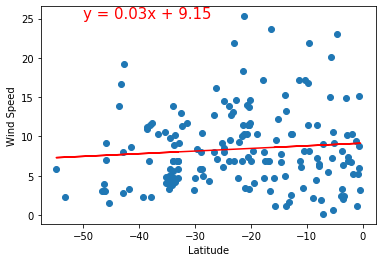

In [44]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Wind Speed']
plot_linear(x_values,y_values,"Wind Speed",(-50,25),"images/SWindspeed.png")